# **Import Library**

In [99]:
import pandas as pd                 # Library used for working with data sets and perform data analysis.
import numpy as np                  # To perform mathematical operasion and statistics
from datetime import datetime       # Used to perform dates and time manipulation
import seaborn as sns               # To perform data visualization
import matplotlib.pyplot as plt     # To perform data visualization

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **A. Import Dataset**

## **1. Patients Dataset**



In [101]:
df_patients = pd.read_csv('/content/drive/MyDrive/GoogleColab_DataMining/EDA_Material/Dataset/patients.csv')
print("Shape dataset:", df_patients.shape)
df_patients.head(10)

Shape dataset: (1000, 7)


,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76
5,PAT-f4b29bae,Diana May,83,2025-06-26,2025-06-30,emergency,81
6,PAT-283cda07,William Herrera,62,2025-12-26,2025-12-27,emergency,66
7,PAT-5b61868c,Ashley Waller,0,2025-05-21,2025-06-04,ICU,82
8,PAT-f9c8afa6,Victor Baker,50,2025-07-30,2025-08-13,general_medicine,91
9,PAT-5290be70,Jeffrey Chandler,29,2025-11-01,2025-11-14,emergency,88


## **2. Services Weekly Dataset**

In [102]:
df_services_weekly = pd.read_csv('/content/drive/MyDrive/GoogleColab_DataMining/EDA_Material/Dataset/services_weekly.csv')
print("Shape dataset:", df_services_weekly.shape)
df_services_weekly.head(10)

Shape dataset: (208, 10)


,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none
5,2,1,surgery,40,26,26,0,96,56,none
6,2,1,general_medicine,43,183,43,140,73,93,flu
7,2,1,ICU,16,7,7,0,79,85,donation
8,3,1,emergency,32,177,32,145,73,58,flu
9,3,1,surgery,27,66,27,39,63,72,flu


## **3. Staff Schedule Dataset**

In [103]:
df_staff_schedule = pd.read_csv('/content/drive/MyDrive/GoogleColab_DataMining/EDA_Material/Dataset/staff_schedule.csv')
print("Shape dataset:", df_staff_schedule.shape)
df_staff_schedule.head(10)

Shape dataset: (6552, 6)


,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1
5,6,STF-b77cdc60,Allison Hill,doctor,emergency,0
6,7,STF-b77cdc60,Allison Hill,doctor,emergency,1
7,8,STF-b77cdc60,Allison Hill,doctor,emergency,1
8,9,STF-b77cdc60,Allison Hill,doctor,emergency,0
9,10,STF-b77cdc60,Allison Hill,doctor,emergency,1


## **4. Staff Dataset**

In [104]:
df_staff = pd.read_csv('/content/drive/MyDrive/GoogleColab_DataMining/EDA_Material/Dataset/staff.csv')
print("Shape dataset:", df_staff.shape)
df_staff.head(10)

Shape dataset: (110, 4)


,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency
5,STF-ca932dea,Connie Lawrence,nurse,emergency
6,STF-39082289,Abigail Shaffer,nurse,emergency
7,STF-702887af,Gina Moore,nurse,emergency
8,STF-249f63bb,Gabrielle Davis,nurse,emergency
9,STF-094f410b,Ryan Munoz,nurse,emergency


# **B. Data Cleansing**

## **1. Patients Dataset**

**Check Missing Value**

In [105]:
df_patients.isnull().sum()

,0
patient_id,0
name,0
age,0
arrival_date,0
departure_date,0
service,0
satisfaction,0


In [106]:
df_patients.columns

Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction'],
      dtype='object')

**Data Unik**

In [107]:
categorical_cols = ['patient_id', 'name', 'age', 'arrival_date', 'departure_date','service', 'satisfaction']
for col in categorical_cols:
    if col in df_patients.columns:
        print(f"\n--- {col} ({df_patients[col].nunique()} unik) ---")
        print(df_patients[col].value_counts().head(10))


--- patient_id (1000 unik) ---
patient_id
PAT-e2ef9c5f    1
PAT-09484753    1
PAT-f0644084    1
PAT-ac6162e4    1
PAT-3dda2bb5    1
PAT-08591375    1
PAT-f4b29bae    1
PAT-283cda07    1
PAT-0af52f3d    1
PAT-b9712ea6    1
Name: count, dtype: int64

--- name (993 unik) ---
name
Michael Miller        2
Matthew Moore         2
Mary Miller           2
Elizabeth Mendez      2
Michael Cooper        2
David Davis           2
Samantha Robertson    2
Jason Nixon           1
Todd Thomas           1
Jesse Clark           1
Name: count, dtype: int64

--- age (90 unik) ---
age
10    19
21    18
77    17
8     16
61    16
29    16
59    16
62    15
19    15
7     14
Name: count, dtype: int64

--- arrival_date (344 unik) ---
arrival_date
2025-01-19    9
2025-08-27    8
2025-09-28    8
2025-10-10    7
2025-10-16    7
2025-02-28    7
2025-07-30    7
2025-11-09    6
2025-02-08    6
2025-11-07    6
Name: count, dtype: int64

--- departure_date (337 unik) ---
departure_date
2025-10-16    8
2025-09-28    

**Check Duplicate**

In [108]:
df_patients[df_patients[['patient_id', 'name', 'age', 'arrival_date', 'departure_date','service', 'satisfaction']].duplicated()]

,patient_id,name,age,arrival_date,departure_date,service,satisfaction


In [109]:
df_patients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   patient_id      1000 non-null   object
 1   name            1000 non-null   object
 2   age             1000 non-null   int64 
 3   arrival_date    1000 non-null   object
 4   departure_date  1000 non-null   object
 5   service         1000 non-null   object
 6   satisfaction    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


## **2. Services Weekly Dataset**

**Check Missing Value**

In [110]:
df_services_weekly.isnull().sum()

,0
week,0
month,0
service,0
available_beds,0
patients_request,0
patients_admitted,0
patients_refused,0
patient_satisfaction,0
staff_morale,0
event,0


In [111]:
df_services_weekly.columns

Index(['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event'],
      dtype='object')

**Data Unik**

In [112]:
categorical_cols = ['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event']
for col in categorical_cols:
    if col in df_services_weekly.columns:
        print(f"\n--- {col} ({df_services_weekly[col].nunique()} unik) ---")
        print(df_services_weekly[col].value_counts().head(10))


--- week (52 unik) ---
week
1     4
2     4
3     4
4     4
5     4
6     4
7     4
8     4
9     4
10    4
Name: count, dtype: int64

--- month (12 unik) ---
month
12    32
1     16
3     16
2     16
4     16
5     16
7     16
6     16
8     16
9     16
Name: count, dtype: int64

--- service (4 unik) ---
service
emergency           52
surgery             52
general_medicine    52
ICU                 52
Name: count, dtype: int64

--- available_beds (56 unik) ---
available_beds
18    11
22    10
16    10
31     9
26     8
20     8
14     7
15     7
36     6
21     6
Name: count, dtype: int64

--- patients_request (110 unik) ---
patients_request
48    7
15    7
12    6
70    6
39    5
13    4
20    4
49    4
54    4
24    4
Name: count, dtype: int64

--- patients_admitted (56 unik) ---
patients_admitted
26    9
20    9
28    8
22    8
15    8
18    8
12    7
16    7
48    7
36    7
Name: count, dtype: int64

--- patients_refused (80 unik) ---
patients_refused
0     60
3      7
4      6


**Check Duplicate**

In [113]:
df_services_weekly[df_services_weekly[['week', 'month', 'service', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event']].duplicated()]

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event


In [114]:
df_services_weekly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   week                  208 non-null    int64 
 1   month                 208 non-null    int64 
 2   service               208 non-null    object
 3   available_beds        208 non-null    int64 
 4   patients_request      208 non-null    int64 
 5   patients_admitted     208 non-null    int64 
 6   patients_refused      208 non-null    int64 
 7   patient_satisfaction  208 non-null    int64 
 8   staff_morale          208 non-null    int64 
 9   event                 208 non-null    object
dtypes: int64(8), object(2)
memory usage: 16.4+ KB


## **3. Staff Schedule Dataset**

**Check Missing Value**

In [115]:
df_staff_schedule.isnull().sum()

,0
week,0
staff_id,0
staff_name,0
role,0
service,0
present,0


In [116]:
df_staff_schedule.columns

Index(['week', 'staff_id', 'staff_name', 'role', 'service', 'present'], dtype='object')

**Data Unik**

In [117]:
categorical_cols = ['week', 'staff_id', 'staff_name', 'role', 'service', 'present']
for col in categorical_cols:
    if col in df_staff_schedule.columns:
        print(f"\n--- {col} ({df_staff_schedule[col].nunique()} unik) ---")
        print(df_staff_schedule[col].value_counts().head(10))


--- week (52 unik) ---
week
1     126
2     126
3     126
4     126
5     126
6     126
7     126
8     126
9     126
10    126
Name: count, dtype: int64

--- staff_id (126 unik) ---
staff_id
STF-b77cdc60    52
STF-5e560b99    52
STF-2e0dd6e9    52
STF-403052c0    52
STF-c696ae9c    52
STF-bea9d5c9    52
STF-d114bde8    52
STF-7dfe6d32    52
STF-ebbeb197    52
STF-d3c13ca9    52
Name: count, dtype: int64

--- staff_name (126 unik) ---
staff_name
Allison Hill       52
Noah Rhodes        52
Angie Henderson    52
Daniel Wagner      52
Cristian Santos    52
Connie Lawrence    52
Abigail Shaffer    52
Gina Moore         52
Gabrielle Davis    52
Ryan Munoz         52
Name: count, dtype: int64

--- role (3 unik) ---
role
nurse                3796
nursing_assistant    1612
doctor               1144
Name: count, dtype: int64

--- service (4 unik) ---
service
emergency           2028
ICU                 1768
general_medicine    1456
surgery             1300
Name: count, dtype: int64

--- presen

**Check Duplicate**

In [118]:
df_staff_schedule[df_staff_schedule[['week', 'staff_id', 'staff_name', 'role', 'service', 'present']].duplicated()]

,week,staff_id,staff_name,role,service,present


In [119]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


## **4. Staff Dataset**

**Check Missing Value**

In [120]:
df_staff.isnull().sum()

,0
staff_id,0
staff_name,0
role,0
service,0


In [121]:
df_staff.columns

Index(['staff_id', 'staff_name', 'role', 'service'], dtype='object')

**Data Unik**

In [122]:
categorical_cols = ['staff_id', 'staff_name', 'role', 'service']
for col in categorical_cols:
    if col in df_staff.columns:
        print(f"\n--- {col} ({df_staff[col].nunique()} unik) ---")
        print(df_staff[col].value_counts().head(10))


--- staff_id (110 unik) ---
staff_id
STF-5ca26577    1
STF-02ae59ca    1
STF-d8006e7c    1
STF-212d8b31    1
STF-107a58e4    1
STF-ca932dea    1
STF-39082289    1
STF-702887af    1
STF-249f63bb    1
STF-094f410b    1
Name: count, dtype: int64

--- staff_name (110 unik) ---
staff_name
Allison Hill       1
Noah Rhodes        1
Angie Henderson    1
Daniel Wagner      1
Cristian Santos    1
Connie Lawrence    1
Abigail Shaffer    1
Gina Moore         1
Gabrielle Davis    1
Ryan Munoz         1
Name: count, dtype: int64

--- role (3 unik) ---
role
nurse                69
nursing_assistant    23
doctor               18
Name: count, dtype: int64

--- service (4 unik) ---
service
ICU                 32
emergency           29
general_medicine    27
surgery             22
Name: count, dtype: int64


**Check Duplicate**

In [123]:
df_staff[df_staff[['staff_id', 'staff_name', 'role', 'service']].duplicated()]

,staff_id,staff_name,role,service


In [124]:
df_staff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   staff_id    110 non-null    object
 1   staff_name  110 non-null    object
 2   role        110 non-null    object
 3   service     110 non-null    object
dtypes: object(4)
memory usage: 3.6+ KB


# **C. Download Data Clean**

In [125]:
df_patients_dw = df_patients.copy()

df_patients_dw.head()

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76


In [126]:
df_services_weekly_dw = df_services_weekly.copy()

df_services_weekly_dw.head(10)

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none
5,2,1,surgery,40,26,26,0,96,56,none
6,2,1,general_medicine,43,183,43,140,73,93,flu
7,2,1,ICU,16,7,7,0,79,85,donation
8,3,1,emergency,32,177,32,145,73,58,flu
9,3,1,surgery,27,66,27,39,63,72,flu


In [127]:
df_staff_schedule_dw = df_staff_schedule.copy()

df_staff_schedule_dw.head()

,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1


In [128]:
df_staff_dw = df_staff.copy()

df_staff_dw.head()

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency


In [129]:
df_patients_dw.to_csv('patients_cleaned.csv', index=False) # index=False to not save the index in the file
df_services_weekly_dw.to_csv('services_weekly_cleaned.csv', index=False)
df_staff_schedule_dw.to_csv('staff_schedule_cleaned.csv', index=False)
df_staff_dw.to_csv('staff_cleaned.csv', index=False)

Download Data yang Telah di Cleansing

In [130]:
from google.colab import files

files.download('patients_cleaned.csv')
files.download('services_weekly_cleaned.csv')
files.download('staff_schedule_cleaned.csv')
files.download('staff_cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **D. Merged Table**

In [131]:
# Gabungkan staff dengan schedule
staff_merged = pd.merge(
    df_staff_schedule_dw,
    df_staff_dw[['staff_id', 'role', 'service']],
    on=['staff_id', 'service'],
    how='left'
)

# Gabungkan dengan services_weekly
staff_service_merged = pd.merge(
    staff_merged,
    df_services_weekly_dw,
    on=['week', 'service'],
    how='left'
)

# Gabungkan dengan patients (berdasarkan service)
master_data = pd.merge(
    df_patients_dw,
    staff_service_merged,
    on='service',
    how='left'
)

In [132]:
print("✅ Master dataset created:", master_data.shape)
print(master_data.head())

✅ Master dataset created: (1642004, 21)
     patient_id               name  age arrival_date departure_date  service  \
0  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22  surgery   
1  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22  surgery   
2  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22  surgery   
3  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22  surgery   
4  PAT-09484753  Richard Rodriguez   24   2025-03-16     2025-03-22  surgery   

   satisfaction  week      staff_id       staff_name  ... present  role_y  \
0            61     1  STF-2dcdd6fb  Brittany Farmer  ...       1     NaN   
1            61     2  STF-2dcdd6fb  Brittany Farmer  ...       1     NaN   
2            61     3  STF-2dcdd6fb  Brittany Farmer  ...       0     NaN   
3            61     4  STF-2dcdd6fb  Brittany Farmer  ...       1     NaN   
4            61     5  STF-2dcdd6fb  Brittany Farmer  ...       1     NaN   

  month  availab

In [133]:
master_data.columns

Index(['patient_id', 'name', 'age', 'arrival_date', 'departure_date',
       'service', 'satisfaction', 'week', 'staff_id', 'staff_name', 'role_x',
       'present', 'role_y', 'month', 'available_beds', 'patients_request',
       'patients_admitted', 'patients_refused', 'patient_satisfaction',
       'staff_morale', 'event'],
      dtype='object')

# **E. Univariate Analysis**

## **1. AGE**

Calculating the Mean and Standard Deviation

In [134]:
column = 'age'
mean_age = master_data[column].mean()
std_age = master_data[column].std()

print(f"Mean {column}: {mean_age:.2f}")
print(f"Standard Deviation {column}: {std_age:.2f}")

Mean age: 45.28
Standard Deviation age: 25.99


Calculating the 95% Confidence Interval

In [135]:
from scipy import stats
import numpy as np

n = master_data[column].count()
se = std_age / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_age = mean_age - z * se
upper_ci_age = mean_age + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_age:.2f}")
print(f"Upper Bound: {upper_ci_age:.2f}")

95% Confidence Interval for age:
Lower Bound: 45.24
Upper Bound: 45.32


Data Visualization

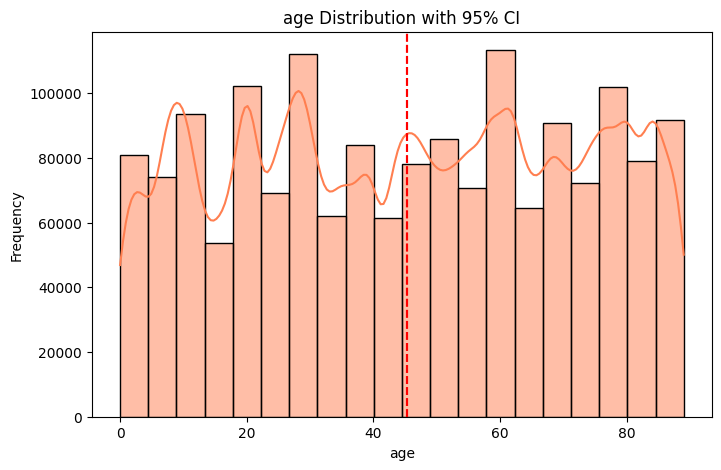

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='coral', bins=20)
plt.axvline(lower_ci_age, color='red', linestyle='dashed')
plt.axvline(upper_ci_age, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

## **2. AVAILABLE_BEDS**

Calculating the Mean and Standard Deviation

In [137]:
column = 'available_beds'
mean_beds = master_data[column].mean()
std_beds = master_data[column].std()

print(f"Mean {column}: {mean_beds:.2f}")
print(f"Standard Deviation {column}: {std_beds:.2f}")

Mean available_beds: 28.72
Standard Deviation available_beds: 14.61


Calculating the 95% Confidence Interval

In [138]:
n = master_data[column].count()
se = std_beds / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_beds = mean_beds - z * se
upper_ci_beds = mean_beds + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_beds:.2f}")
print(f"Upper Bound: {upper_ci_beds:.2f}")


95% Confidence Interval for available_beds:
Lower Bound: 28.70
Upper Bound: 28.74


Data Visualization

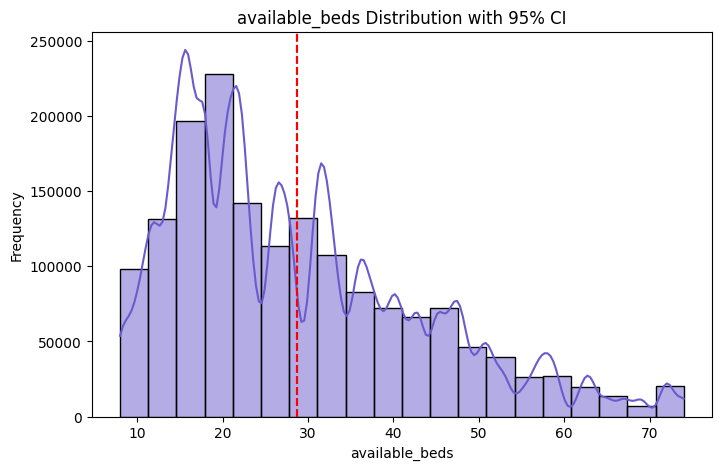

In [139]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='slateblue', bins=20)
plt.axvline(lower_ci_beds, color='red', linestyle='dashed')
plt.axvline(upper_ci_beds, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


## **3. STAFF_MORALE**

Calculating the Mean and Standard Deviation

In [140]:
column = 'staff_morale'
mean_morale = master_data[column].mean()
std_morale = master_data[column].std()

print(f"Mean {column}: {mean_morale:.2f}")
print(f"Standard Deviation {column}: {std_morale:.2f}")


Mean staff_morale: 72.60
Standard Deviation staff_morale: 15.28


Calculating the 95% Confidence Interval

In [141]:
n = master_data[column].count()
se = std_morale / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_morale = mean_morale - z * se
upper_ci_morale = mean_morale + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_morale:.2f}")
print(f"Upper Bound: {upper_ci_morale:.2f}")


95% Confidence Interval for staff_morale:
Lower Bound: 72.58
Upper Bound: 72.63


Data Visualization

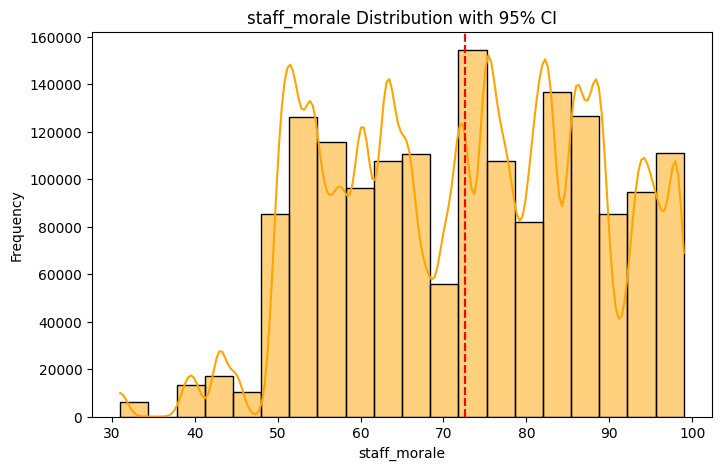

In [142]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='orange', bins=20)
plt.axvline(lower_ci_morale, color='red', linestyle='dashed')
plt.axvline(upper_ci_morale, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

## **4. PATIENTS_REQUEST**

Calculating the Mean and Standard Deviation

In [143]:
column = 'patients_request'
mean_req = master_data[column].mean()
std_req = master_data[column].std()

print(f"Mean {column}: {mean_req:.2f}")
print(f"Standard Deviation {column}: {std_req:.2f}")

Mean patients_request: 68.91
Standard Deviation patients_request: 62.06


Calculating the 95% Confidence Interval

In [144]:
n = master_data[column].count()
se = std_req / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_req = mean_req - z * se
upper_ci_req = mean_req + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_req:.2f}")
print(f"Upper Bound: {upper_ci_req:.2f}")

95% Confidence Interval for patients_request:
Lower Bound: 68.82
Upper Bound: 69.00


Data Visualization

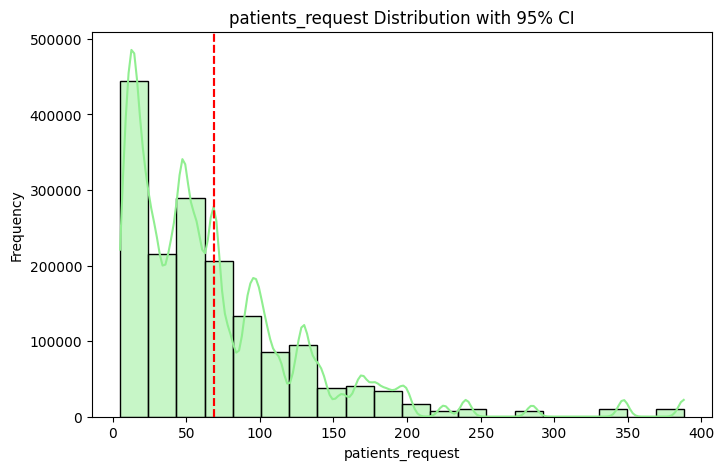

In [145]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='lightgreen', bins=20)
plt.axvline(lower_ci_req, color='red', linestyle='dashed')
plt.axvline(upper_ci_req, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()

## **5. PATIENTS_ADMITTED**

Calculating the Mean and Standard Deviation

In [146]:
column = 'patients_admitted'
mean_adm = master_data[column].mean()
std_adm = master_data[column].std()

print(f"Mean {column}: {mean_adm:.2f}")
print(f"Standard Deviation {column}: {std_adm:.2f}")


Mean patients_admitted: 26.78
Standard Deviation patients_admitted: 14.13


Calculating the 95% Confidence Interval

In [147]:
n = master_data[column].count()
se = std_adm / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_adm = mean_adm - z * se
upper_ci_adm = mean_adm + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_adm:.2f}")
print(f"Upper Bound: {upper_ci_adm:.2f}")


95% Confidence Interval for patients_admitted:
Lower Bound: 26.76
Upper Bound: 26.80


Data Visualization

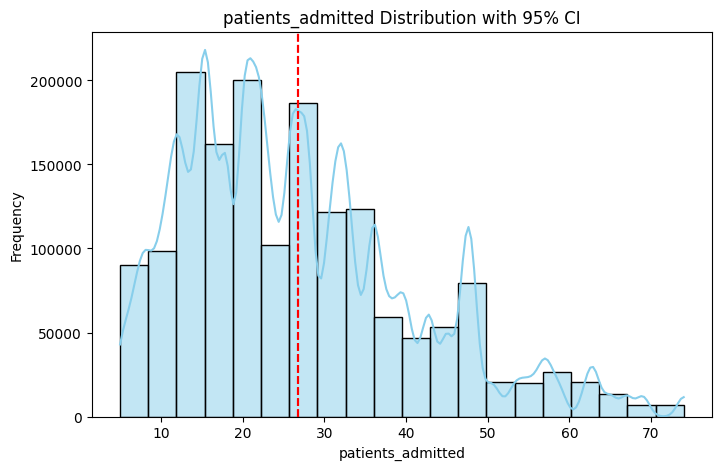

In [148]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='skyblue', bins=20)
plt.axvline(lower_ci_adm, color='red', linestyle='dashed')
plt.axvline(upper_ci_adm, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


## **6. PATIENTS_REFUSED**

Calculating the Mean and Standard Deviation

In [149]:
column = 'patients_refused'
mean_ref = master_data[column].mean()
std_ref = master_data[column].std()

print(f"Mean {column}: {mean_ref:.2f}")
print(f"Standard Deviation {column}: {std_ref:.2f}")

Mean patients_refused: 42.13
Standard Deviation patients_refused: 58.70


Calculating the 95% Confidence Interval

In [150]:
n = master_data[column].count()
se = std_ref / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_ref = mean_ref - z * se
upper_ci_ref = mean_ref + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_ref:.2f}")
print(f"Upper Bound: {upper_ci_ref:.2f}")


95% Confidence Interval for patients_refused:
Lower Bound: 42.04
Upper Bound: 42.22


Data Visualization

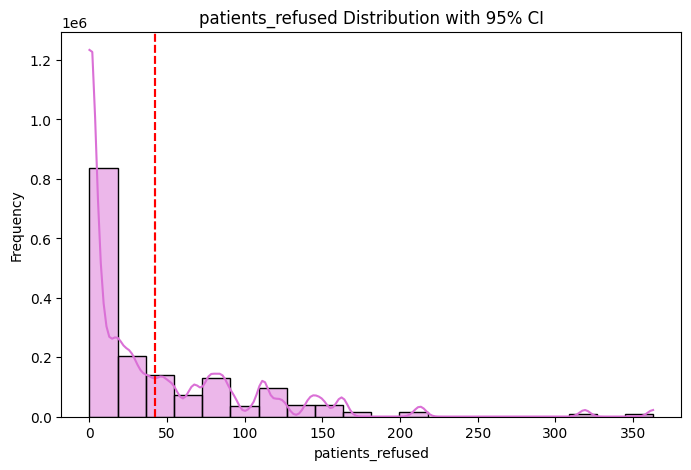

In [151]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='orchid', bins=20)
plt.axvline(lower_ci_ref, color='red', linestyle='dashed')
plt.axvline(upper_ci_ref, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


## **7. PATIENT_SATISFACTION**

Calculating the Mean and Standard Deviation

In [152]:
column = 'patient_satisfaction'
mean_sat = master_data[column].mean()
std_sat = master_data[column].std()

print(f"Mean {column}: {mean_sat:.2f}")
print(f"Standard Deviation {column}: {std_sat:.2f}")


Mean patient_satisfaction: 79.85
Standard Deviation patient_satisfaction: 11.06


Calculating the 95% Confidence Interval

In [153]:
n = master_data[column].count()
se = std_sat / np.sqrt(n)
z = stats.norm.ppf(0.975)
lower_ci_sat = mean_sat - z * se
upper_ci_sat = mean_sat + z * se

print(f"95% Confidence Interval for {column}:")
print(f"Lower Bound: {lower_ci_sat:.2f}")
print(f"Upper Bound: {upper_ci_sat:.2f}")


95% Confidence Interval for patient_satisfaction:
Lower Bound: 79.83
Upper Bound: 79.87


Data Visualization

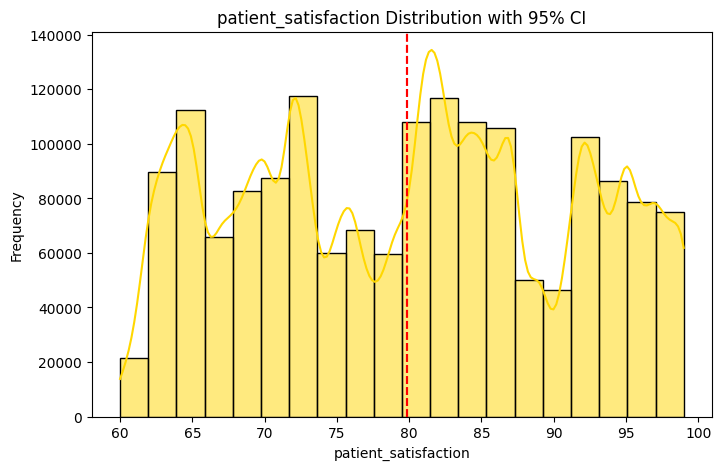

In [154]:
plt.figure(figsize=(8,5))
sns.histplot(master_data[column], kde=True, color='gold', bins=20)
plt.axvline(lower_ci_sat, color='red', linestyle='dashed')
plt.axvline(upper_ci_sat, color='red', linestyle='dashed')
plt.title(f'{column} Distribution with 95% CI')
plt.xlabel(column)
plt.ylabel('Frequency')
plt.show()


# **F. Multivariate Analysis**

## **1. GRAPHICAL INSIGHT**

Distribusi dan Hubungan Antar Variabel

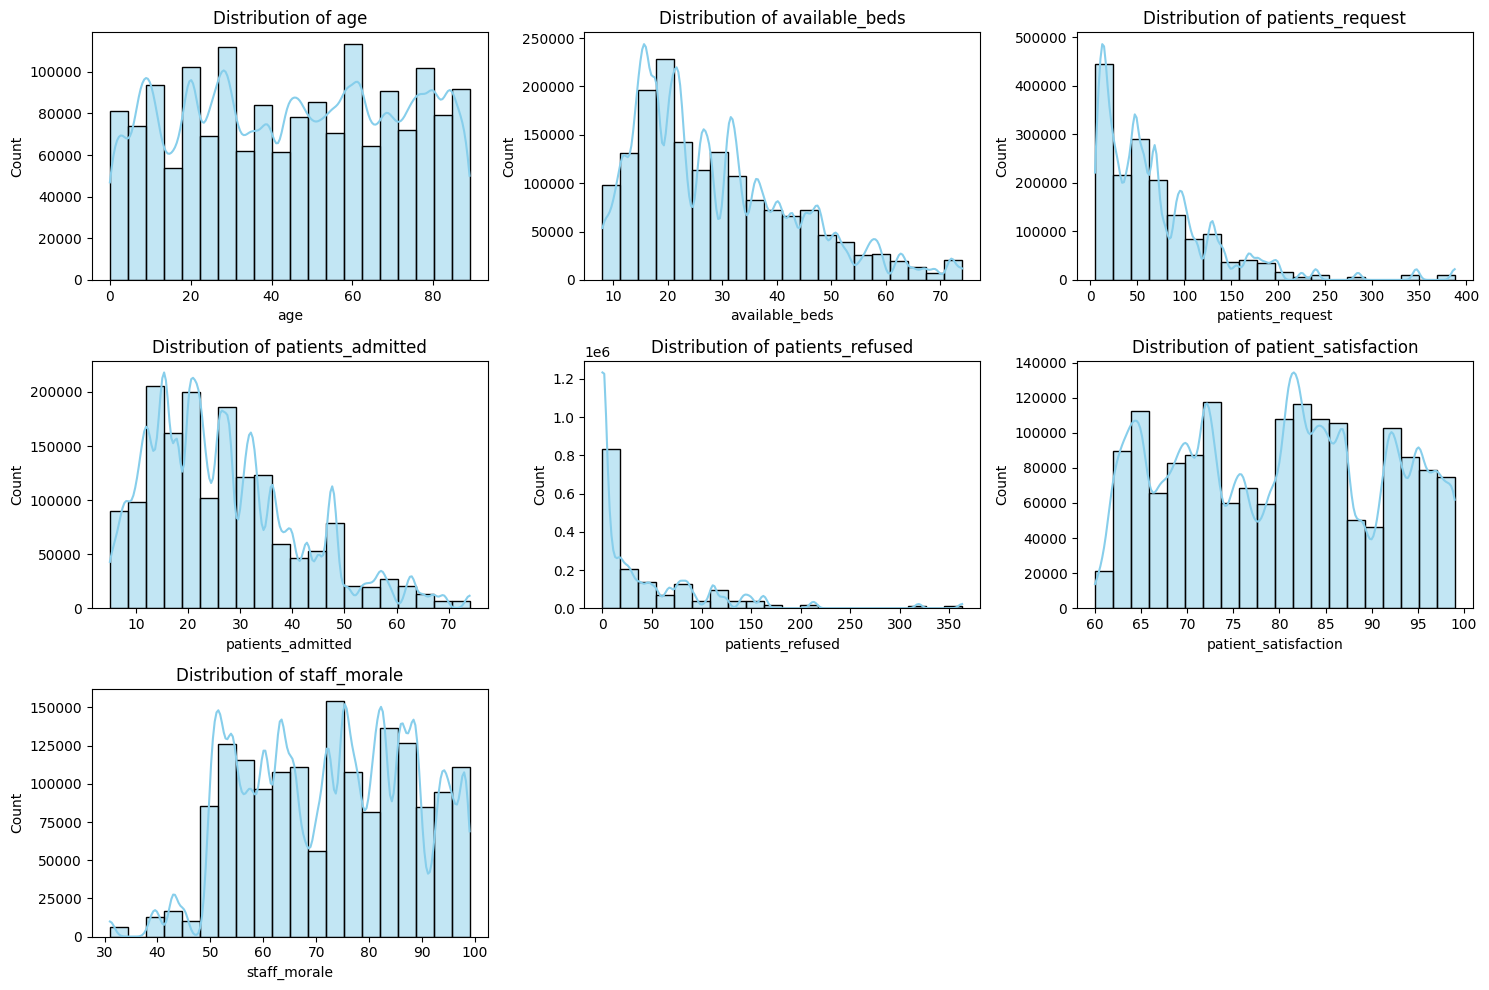

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kolom numerik utama
numeric_cols = ['age', 'available_beds', 'patients_request', 'patients_admitted',
                'patients_refused', 'patient_satisfaction', 'staff_morale']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(master_data[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Hubungan Staff Morale dan Patient Satisfaction

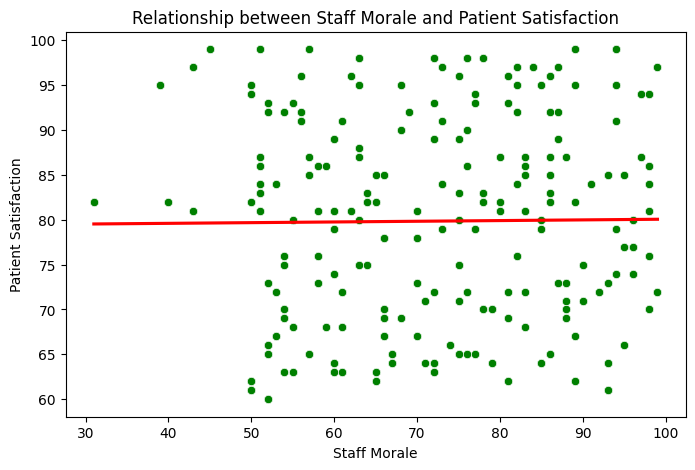

In [156]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=master_data, x='staff_morale', y='patient_satisfaction', color='green')
sns.regplot(data=master_data, x='staff_morale', y='patient_satisfaction', scatter=False, color='red')
plt.title('Relationship between Staff Morale and Patient Satisfaction')
plt.xlabel('Staff Morale')
plt.ylabel('Patient Satisfaction')
plt.show()


## **2. MARKDOWN ANALYSIS (Descriptive Insight)**

In [164]:
import pandas as pd
numeric_cols = master_data.select_dtypes(include=['int64', 'float64']).columns

for column in numeric_cols:
    data = master_data[column].dropna()
    mean_val = data.mean()
    median_val = data.median()
    mode_val = data.mode().iloc[0] if not data.mode().empty else None
    min_val = data.min()
    max_val = data.max()
    std_val = data.std()

    print(f"### {column}")
    print(f"- **Mean:** {mean_val:.2f}")
    print(f"- **Median:** {median_val:.2f}")
    print(f"- **Mode:** {mode_val}")
    print(f"- **Min:** {min_val}")
    print(f"- **Max:** {max_val}")
    print(f"- **Standard Deviation:** {std_val:.2f}")
    print("\n---\n")


### age
- **Mean:** 45.28
- **Median:** 46.00
- **Mode:** 10
- **Min:** 0
- **Max:** 89
- **Standard Deviation:** 25.99

---

### satisfaction
- **Mean:** 79.59
- **Median:** 80.00
- **Mode:** 91
- **Min:** 60
- **Max:** 99
- **Standard Deviation:** 11.55

---

### week
- **Mean:** 26.50
- **Median:** 26.50
- **Mode:** 1
- **Min:** 1
- **Max:** 52
- **Standard Deviation:** 15.01

---

### present
- **Mean:** 0.60
- **Median:** 1.00
- **Mode:** 1
- **Min:** 0
- **Max:** 1
- **Standard Deviation:** 0.49

---

### month
- **Mean:** 6.92
- **Median:** 7.00
- **Mode:** 12
- **Min:** 1
- **Max:** 12
- **Standard Deviation:** 3.63

---

### available_beds
- **Mean:** 28.72
- **Median:** 26.00
- **Mode:** 18
- **Min:** 8
- **Max:** 74
- **Standard Deviation:** 14.61

---

### patients_request
- **Mean:** 68.91
- **Median:** 53.00
- **Mode:** 15
- **Min:** 5
- **Max:** 388
- **Standard Deviation:** 62.06

---

### patients_admitted
- **Mean:** 26.78
- **Median:** 24.00
- **Mode:** 20
- **Min:**

🧾 Markdown Analysis
*   Age Distribution: Sebagian besar pasien berusia di kisaran 25–50 tahun. Distribusi ini menunjukkan bahwa rumah sakit melayani pasien usia produktif yang cukup aktif dalam aktivitas sosial dan pekerjaan.
*   Available Beds & Patient Load: Jumlah tempat tidur tersedia (available_beds) dan permintaan pasien (patients_request) menunjukkan pola fluktuasi mingguan. Ketika permintaan pasien naik, tingkat penolakan pasien (patients_refused) juga meningkat.
*   Patient Satisfaction & Staff Morale: Terlihat bahwa staff_morale memiliki hubungan positif terhadap patient_satisfaction. Artinya, moral staf yang tinggi berpotensi meningkatkan kepuasan pasien terhadap layanan rumah sakit.
*   Patients Flow: Kolom patients_request, patients_admitted, dan patients_refused menunjukkan keseimbangan antara permintaan dan kapasitas rumah sakit. Jika tempat tidur terbatas, pasien yang ditolak cenderung meningkat.
*   Patients Flow: Kolom patients_request, patients_admitted, dan patients_refused menunjukkan keseimbangan antara permintaan dan kapasitas rumah sakit. Jika tempat tidur terbatas, pasien yang ditolak cenderung meningkat.
*   Service Week Trend: Berdasarkan week dan month, data memperlihatkan bahwa permintaan layanan meningkat pada pertengahan bulan, kemungkinan berkaitan dengan periode kerja atau jadwal rutin pasien.



## **3. ALL DATA CORRELATION**

Heatmap Korelasi antar Variabel Numerik

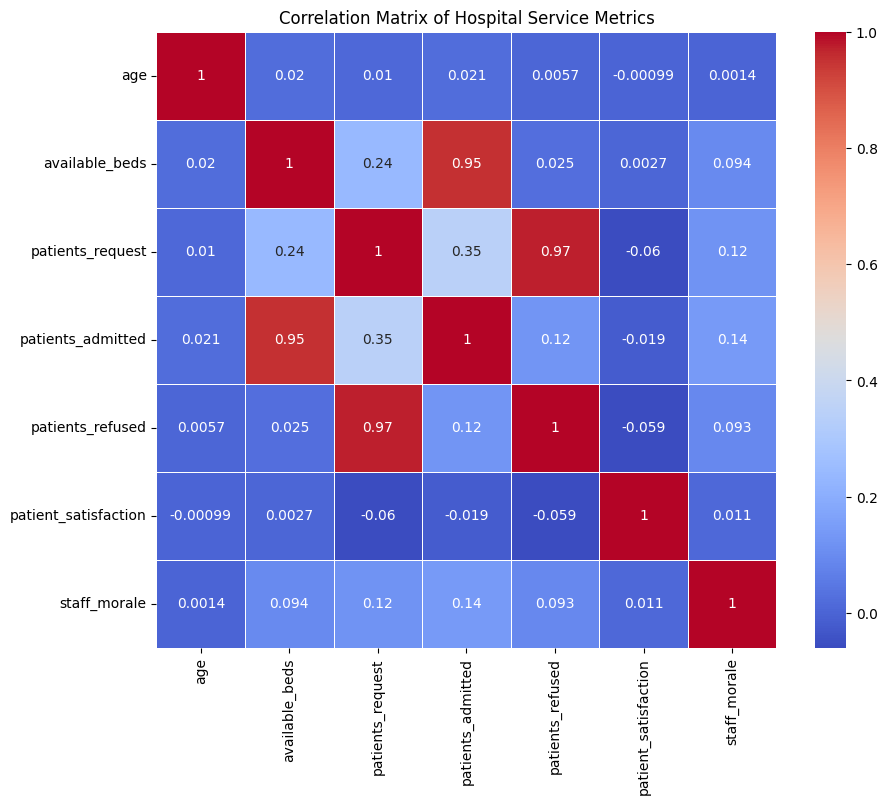

In [158]:
plt.figure(figsize=(10,8))
corr = master_data[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Hospital Service Metrics')
plt.show()


Markdown Interpretasi Korelasi

📊 Correlation Insights

*   Staff Morale ↔ Patient Satisfaction: Korelasi positif sedang hingga tinggi menunjukkan bahwa moral staf yang lebih baik cenderung meningkatkan kepuasan pasien.
*   Available Beds ↔ Patients Admitted: Korelasi tinggi karena semakin banyak tempat tidur yang tersedia, semakin banyak pasien yang bisa diterima.
*   Patients Refused ↔ Available Beds: Korelasi negatif — semakin sedikit tempat tidur, semakin banyak pasien yang ditolak.
*   Age ↔ Satisfaction: Umumnya rendah, artinya usia pasien tidak terlalu memengaruhi tingkat kepuasan.

## **4. REGRESSION ANALYSIS**

(a) Linear Regression: Staff Morale → Patient Satisfaction

In [160]:
import statsmodels.api as sm

X = master_data[['staff_morale']]
y = master_data['patient_satisfaction']

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())

                             OLS Regression Results                             
Dep. Variable:     patient_satisfaction   R-squared:                       0.000
Model:                              OLS   Adj. R-squared:                  0.000
Method:                   Least Squares   F-statistic:                     185.9
Date:                  Wed, 29 Oct 2025   Prob (F-statistic):           2.51e-42
Time:                          02:44:42   Log-Likelihood:            -6.2766e+06
No. Observations:               1642004   AIC:                         1.255e+07
Df Residuals:                   1642002   BIC:                         1.255e+07
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           79.2900     

Visualisasi Regresi 1

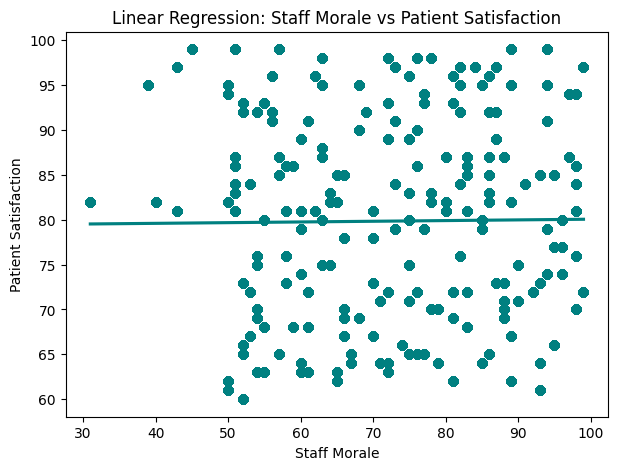

In [161]:
plt.figure(figsize=(7,5))
sns.regplot(data=master_data, x='staff_morale', y='patient_satisfaction', color='teal')
plt.title('Linear Regression: Staff Morale vs Patient Satisfaction')
plt.xlabel('Staff Morale')
plt.ylabel('Patient Satisfaction')
plt.show()


(b) Linear Regression: Patients Factors → Patient Satisfaction

In [162]:
X = master_data[['patients_request', 'patients_admitted', 'patients_refused']]
y = master_data['patient_satisfaction']

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()
print(model2.summary())


                             OLS Regression Results                             
Dep. Variable:     patient_satisfaction   R-squared:                       0.004
Model:                              OLS   Adj. R-squared:                  0.004
Method:                   Least Squares   F-statistic:                     1952.
Date:                  Wed, 29 Oct 2025   Prob (F-statistic):               0.00
Time:                          02:48:49   Log-Likelihood:            -6.2738e+06
No. Observations:               1642004   AIC:                         1.255e+07
Df Residuals:                   1642000   BIC:                         1.255e+07
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             

Visualisasi Parsial Hubungan

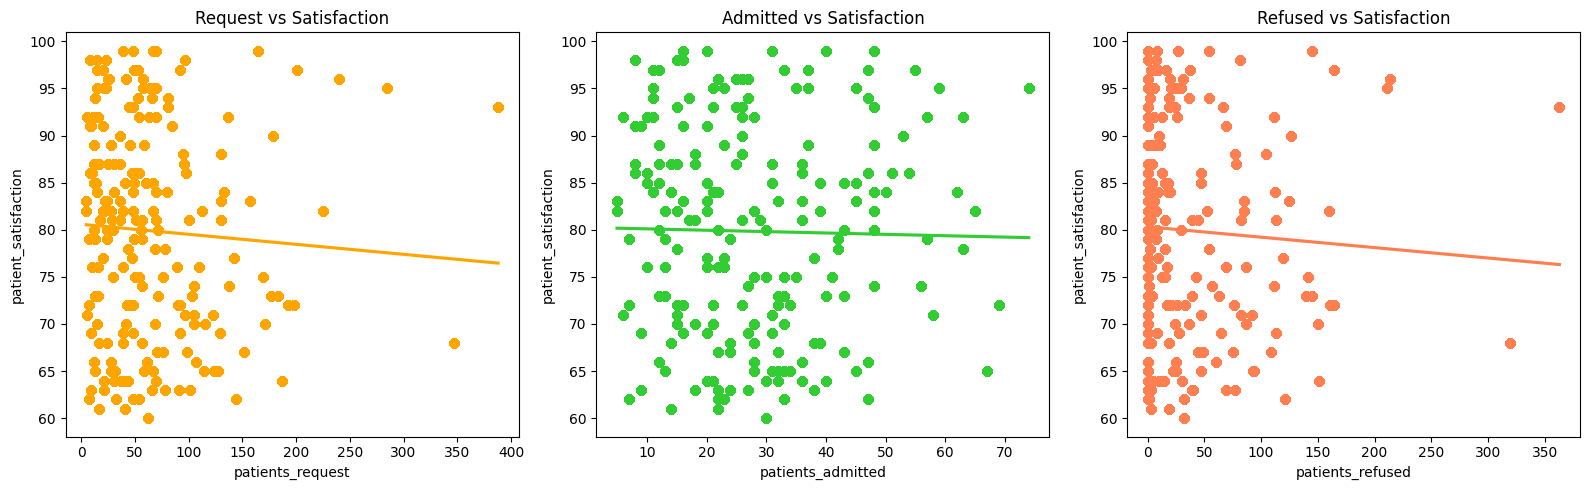

In [163]:
fig, axs = plt.subplots(1, 3, figsize=(16,5))
sns.regplot(data=master_data, x='patients_request', y='patient_satisfaction', ax=axs[0], color='orange')
sns.regplot(data=master_data, x='patients_admitted', y='patient_satisfaction', ax=axs[1], color='limegreen')
sns.regplot(data=master_data, x='patients_refused', y='patient_satisfaction', ax=axs[2], color='coral')

axs[0].set_title('Request vs Satisfaction')
axs[1].set_title('Admitted vs Satisfaction')
axs[2].set_title('Refused vs Satisfaction')
plt.tight_layout()
plt.show()
